# Handlinge the data processing with housing_data.ipynb

In [43]:
import os
import csv
import numpy as np
import pandas as pd
from copy import deepcopy

In [61]:
csv_file_path = './data/housing_data_raw.csv'
ori_data = []

with open(csv_file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    header = next(reader)  
    for row in reader:
        ori_data.append(row)

df = pd.DataFrame(ori_data, columns=header)

print(header)
print(len(ori_data))
ori_data[:5]

['Area', 'No. of Rooms', 'No. of Bathrooms', 'Location', 'Miles (dist. between school and house)', 'Rent Price per Month', 'Sell Price']
1000


[['1360', '1', '1', 'Rural', '463', '7401', '74446632'],
 ['1794', '3', '1', 'Suburb', '210', '9259', '76199794'],
 ['1630', '2', '1', 'Suburb', '157', '16469', '16249579'],
 ['1595', '1', '1', 'Suburb', '133', '18096', '24291317'],
 ['2138', '1', '1', 'Suburb', '10', '9923', '50273384']]

In [62]:
df['Rent Price per Month'] = df['Rent Price per Month'].astype(float)
df['Sell Price'] = df['Sell Price'].astype(float)

# Calculate the 'Rental Yield' and add it as a new column
# This is provided by: https://rich01.com/rental-yield-calculation/ 
df['Rental Yield (%)'] = ((df['Rent Price per Month']*12) / df['Sell Price']) * 100

df.head(5)

,Area,No. of Rooms,No. of Bathrooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%)
0,1360,1,1,Rural,463,7401.0,74446632.0,0.119296
1,1794,3,1,Suburb,210,9259.0,76199794.0,0.145811
2,1630,2,1,Suburb,157,16469.0,16249579.0,1.216204
3,1595,1,1,Suburb,133,18096.0,24291317.0,0.893949
4,2138,1,1,Suburb,10,9923.0,50273384.0,0.236857


In [55]:
# 地點分析 - 計算不同地點的平均售價和平均租金
average_prices_by_location = df.groupby('Location')['Sell Price'].mean()
average_rent_by_location = df.groupby('Location')['Rent Price per Month'].mean()

# 分析不同地點的租售比
rental_yield_by_location = df.groupby('Location')['Rental Yield (%)'].mean()

print("Average Sell Prices by Location:\n", average_prices_by_location)
print("\nAverage Rent Prices by Location:\n", average_rent_by_location)
print("\nAverage Rental Yield by Location:\n", rental_yield_by_location)


Average Sell Prices by Location:
 Location
City Center    4.189646e+07
Rural          4.065140e+07
Suburb         4.359140e+07
Name: Sell Price, dtype: float64

Average Rent Prices by Location:
 Location
City Center    13272.215909
Rural          13086.807692
Suburb         13031.619048
Name: Rent Price per Month, dtype: float64

Average Rental Yield by Location:
 Location
City Center    0.049104
Rural          0.052048
Suburb         0.046444
Name: Rental Yield (%), dtype: float64


In [64]:
# 使用線性回歸分析房間數量和浴室數量與售價之間的關係
from sklearn.linear_model import LinearRegression

# 設定自變量X和因變量y
X = df[['No. of Rooms', 'No. of Bathrooms', 'Area']]
y = df['Sell Price']

# 建立線性回歸模型
model = LinearRegression()
model.fit(X, y)

print("Coefficients for No. of Rooms, No. of Bathrooms, Area:\n", model.coef_)


Coefficients for No. of Rooms, No. of Bathrooms, Area:
 [9.53418758e+05 0.00000000e+00 5.62911506e+02]


In [72]:
# Convert numerical columns from strings to floats using `pd.to_numeric()`
df['Rent Price per Month'] = pd.to_numeric(df['Rent Price per Month'], errors='coerce')
df['Sell Price'] = pd.to_numeric(df['Sell Price'], errors='coerce')
df['Miles (dist. between school and house)'] = pd.to_numeric(df['Miles (dist. between school and house)'], errors='coerce')
# Drop rows with NaN values that resulted from conversion errors
df = df.dropna(subset=['Rent Price per Month', 'Sell Price', 'Miles (dist. between school and house)'])



In [73]:
# 計算距離與售價之間的相關係數
correlation_distance_sell = df['Miles (dist. between school and house)'].corr(df['Sell Price'])
print("Correlation between Distance and Sell Price: ", correlation_distance_sell)


Correlation between Distance and Sell Price:  0.08143404772457158


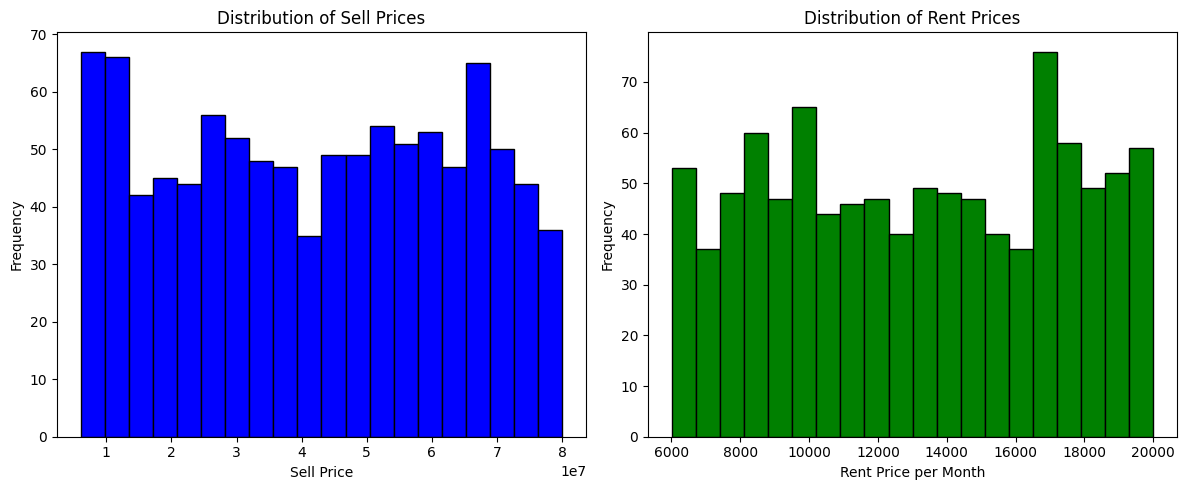

In [66]:
import matplotlib.pyplot as plt

# 繪製租金和售價的直方圖
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Sell Price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Rent Price per Month'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent Price per Month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [69]:
# 計算年投資回報率，假設租金為穩定收入
df['Annual ROI (%)'] = df['Rental Yield (%)'] * 12
df['Annual ROI (%)'].head(10)

0     1.431554
1     1.749737
2    14.594446
3    10.727389
4     2.842283
5    19.859387
6     2.036451
7     4.772563
8     6.337797
9     4.437408
Name: Annual ROI (%), dtype: float64

In [ ]:
header = ['Area', 'No. of Rooms', 'No. of Bathrooms', 'Location', 'Miles (dist. between school and house)', 'Rent Price per Month', 'Sell Price']
header.append('Rental Yield')
data = deepcopy(ori_data)
# print(data[:2])
updated_data = []

for row in data:
    print(row)
    rent_price = float(row[5])
    sell_price = float(row[6])
    rental_rate = (rent_price / sell_price) * 100  # 转换为百分比
    row.append(rental_rate)
    updated_data.append(row)
    break

print(header[5])
updated_data[:2]

['1360', '1', '1', 'Rural', '463', '7401', '74446632']
Rent Price per Month


[['1360', '1', '1', 'Rural', '463', '7401', '74446632', 0.009941349663743014]]